<a href="https://colab.research.google.com/github/GuiCoelhoDev/CoronaryDisease_Analysis/blob/main/Projeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Considerações




Indice Gini avalia ao gerar a floresta randomica, onde a variavel teve uma melhor resposta.

## C.Bishop "Pattern Recognition"

## Hands on Machine learning with scikit learning

## Peter Flach, Machine Learning: the art and science of algorithms that make sense of data

Geron

Russel



1.   
2. ROC: Taxa positiva com taxa negativa
3. 


Técnicas de Aprendizagem de Máquinas como Árvores de Decisão e Florestas Randômicas têm
atingido excelentes resultados na predição/classificação diagnóstica de várias doenças. Um banco
de dados foi coletado na África do Sul sobre doenças cardíacas. São 462 amostras com 10 variáveis.
A variável chd (coronary heart disease, yes=1, no=0) é a classificação y.
O projeto visa aplicar algoritmos de árvores de decisão e Florestas Randômicas para predição de
diabetes com base nesses dados. Sua solução deverá incluir:
1. Faça uma análise estatística inicial dos dados, plotando as quantidades médias, desvios padrões
de todas as variáveis dos dados; (1,0 ponto)
2. Construa um modelo de árvore de decisão (ID3, C4.5 ou CART), separando aleatoriamente
sempre 10% dos dados para teste, em validação cruzada (com 10 rodadas), e mostre o resultado
final em termos de: curva ROC, curva AUC ROC, e matriz de confusão. (2,0 pontos)
3. Construa um modelo de “floresta randômica”, com 100 árvores, usando todas as variáveis
preditoras (i.e. m=9), separando aleatoriamente sempre 10% dos dados para teste, em validação
cruzada (com 10 rodadas), e mostre o resultado final em termos de: curva ROC, curva AUC ROC, e
matriz de confusão. (2,0 pontos)
4. Construa um modelo de “floresta randômica”, com 100 árvores, usando a raiz quadrada das
variaǘeis preditoras (i.e. m=3), separando aleatoriamente sempre 10% dos dados para teste, em
validação cruzada (com 10 rodadas), e mostre o resultado final em termos de: curva ROC, curva
AUC ROC, e matriz de confusão. (2,0 pontos)
5. Mostre, para o caso do melhor resultado, quais as 2 mais importantes/relevantes variáveis
preditoras. (1,0 ponto)
6. Gere, ou nos comentários do código, ou em um texto à parte as saídas e explicações pedidas no
projeto. (2,0 pontos)


# Imports and Google Drive Auth

In [ ]:
#@title  Imports
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
import pandas as pd
from oauth2client.client import GoogleCredentials
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [ ]:
#@title  Google Drive Auth

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
#@title Load dataset

id = '1QFfy98RZcXYdx2U8SePO1TcYwZ236aPT'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('SA_heart.csv')  
dataset = pd.read_csv('SA_heart.csv')
dataset
# Dataset is now stored in a Pandas Dataframe

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


# Questão 1

### Summarize Data (Análise estatística dos dados)


Utilizando o método shape, foi possível perceber que temos 462 amostras com 11 colunas. Sendo 9 colunas sendo variáveis produtoras, uma para o identificador e outra para a classificação da amostra.

Posteriormente, foi utilizado o método sample. Foi escolhido ele em vez do head() ou tail() para poder pegar amostras aleatoriamente no dataset. Ao ver 20 amostras aleatórias, acredita-se que pessoas mais velhas tem mais chance de ter chd do que mais novos. Porém, não da pra ter certeza utilizando apenas esse método. É apenas uma hipótese

Observando os resultados do describe(), verifiquei que a maior parte das amostras são rotuladas como SEM chd pois a média desse valor está em 0.346320.

65% - 0 (hasnt CHD)
35% - 1 (has CHD)

sbp -> systolic blood pressure

Perguntas a serem respondidas:

1.   Dado todos os testados positivos, qual a proporção de idade, alcohol, tobacco, etc deles?




In [ ]:
#@title Análises gerais
print("\nShape")
print(dataset.shape)
print("\nSamples")
print(dataset.sample(20))
print("\nDescribe")
print(dataset[['obesity','age', 'alcohol','chd']].describe())
print("\Columns")
print(dataset.columns)




Shape
(462, 11)

Samples
      id  sbp  tobacco    ldl  adiposity  ... typea  obesity  alcohol  age  chd
305  307  128     0.00   3.22      26.55  ...    39    26.59    16.71   49    0
74    75  128     0.40   6.17      26.35  ...    64    27.86    11.11   34    0
334  336  146     1.35   6.39      34.21  ...    51    26.43     0.00   59    1
5      6  132     6.20   6.47      36.21  ...    62    30.77    14.14   45    0
252  253  166     3.00   3.82      26.75  ...    45    20.86     0.00   63    1
415  417  134     1.10   3.54      20.41  ...    58    24.54    39.91   39    1
47    48  116     1.91   7.56      26.45  ...    52    30.01     3.60   33    1
184  185  116     8.00   6.73      28.81  ...    41    26.74    40.94   48    1
390  392  130     0.54   3.63      22.03  ...    69    24.34    12.86   39    1
200  201  124     0.16   2.44      16.67  ...    65    24.58    74.91   23    0
345  347  198     0.52  11.89      27.68  ...    48    28.40    78.99   26    1
160  161  126 

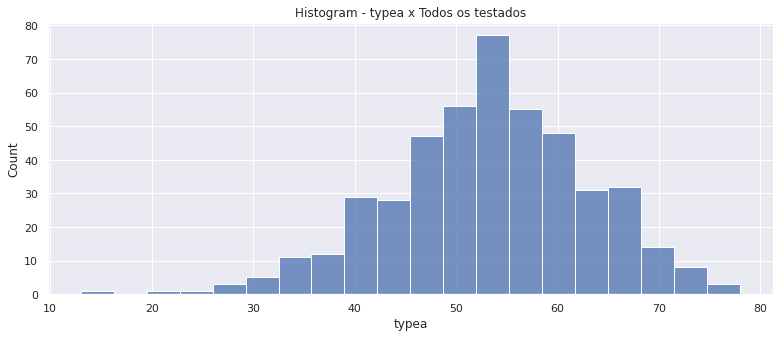

In [ ]:
#@title Dado todos os testados, como a população é distribuida?
sns.set()
plt.figure(figsize=(13,5))
preditor_selecionado = 'typea' #@param ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']
ax = sns.histplot(data=dataset, x=preditor_selecionado, bins=20) 
ax.set_title('Histogram - {} x Todos os testados'.format(preditor_selecionado))
plt.show()



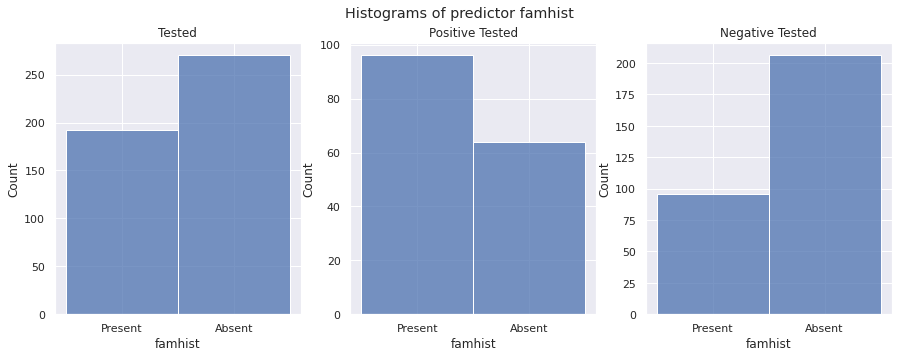

In [ ]:
tested_positive = dataset.query('chd == 1')
tested_negative = dataset.query('chd == 0')

preditor_selecionado = 'famhist' #@param ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']

fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Histograms of predictor {}'.format(preditor_selecionado))
sns.histplot(ax = axes[0], data=dataset, x=preditor_selecionado, bins=20)
axes[0].set_title("Tested")

sns.histplot(ax = axes[1],data=tested_positive, x=preditor_selecionado, bins=20)
axes[1].set_title("Positive Tested")

sns.histplot(ax = axes[2],data=tested_negative, x=preditor_selecionado, bins=20)
axes[2].set_title("Negative Tested")
plt.show()


Baseado nos histogramas acima pode-se concluir:


1.   Quanto maior a idade, maior a chance de ser testado positivo
2.   alcohol, sbp, e ldl não parecem ser preditores muito úteis para classificação
3.   

